<h2> A* Algorithm </h2>

In [1]:
class Node:
    def __init__(self, value,coord):
        self.value = value
        self.coord = coord
        self.g=0; self.h=0 #initialization
        self.parent=None
    
    #This function may be used for debugging 
    def __str__(self):
        s = f'{self.coord} f= {self.g+self.h:0.2f} \
        g={self.g:0.2f}, h= {self.h:0.2f}' 
        return s
    
    def move_cost(self, other):
        return 1 


In [2]:
def children(current_node,grid):
    x,y = current_node.coord
    links = [(x-1, y),(x,y-1),(x,y+1),(x+1,y)]
             #(x+1,y+1),(x-1,y-1),(x+1,y-1),(x-1,y+1)#diagonal moves, add in later.
    
    valid_links=[link for row in grid for link in row if link.value!=0]
    valid_children = [link for link in valid_links if link.coord in links]
        
    return valid_children

In [3]:
# for 4 moves
def manhattan(node, goal):
    #manhattan distance 
    xN,yN = node.coord
    xG,yG = goal.coord
    h = abs(xN-xG) + abs(yN-yG)
    return h

# for 8 moves
def diagonal(node, goal):
    xN,yN = node.coord
    xG,yG  = goal.coord
    dx = abs(xN - xG)
    dy = abs(yN- yG)
    return (dx + dy) - min(dx, dy)

In [4]:
def aStar(start, goal, grid):
    #The open and closed lists
    OPEN = list(); CLOSED=list()
    #Set current node to start node
    current = start
    #Add start node to the OPEN list
    OPEN.append(current)
    i=0 # for tracing purpose
    
    #While the open list is not empty
    while OPEN:
        print('Iteration ',i) # for tracing purpose
        i+=1 # for tracing purpose
        
        #Find the item in the open set with the lowest g + h score
        current = min(OPEN, key=lambda o:o.g + o.h)       
        # print statements for tracing purpose
        print('Current Node', current)
        #print('Contents in OPEN: ')
        # for n in OPEN: print(n)
        # ***************** #
        
        #If it is the item we want, retrace the path and return it
        if current == goal: # trace path by using parent link
            path = []
            while current.parent:
                path.append(current)
                current = current.parent
            path.append(current)
            return path[::-1] 
        
        
        #Move item from OPEN to CLOSED
        OPEN.remove(current); CLOSED.append(current)
        
        #Loop through the node's children/siblings
        for node in children(current,grid):
            #If it is already in the closed list and updated cost is lower, move to OPEN list
            if node in CLOSED:
                new_cost = current.g + current.move_cost(node)
                if new_cost<=node.g: 
                    OPEN.append(node);CLOSED.remove(node)

            #Otherwise if it is already in the open set
            elif node in OPEN:
                #Check if we beat the G score 
                new_cost = current.g + current.move_cost(node)
                if new_cost<=node.g:
                    #If so, update the node to have a new parent
                    node.g = new_cost
                    node.parent = current
            else:
                #If it isn't in the open set, calculate the G and H score for the node      
                node.g = current.g + current.move_cost(node)
                node.h = manhattan(node, goal) 
                #Set the parent to our current item
                node.parent = current
                #Add it to the list
                OPEN.append(node)
    #If no path found
    return None


In [5]:
#use case 1
grid = [[1,1,1,1], #1-not blocked, 0 -  not blocked
        [1,1,1,1],
        [1,1,1,1],
        [1,1,0,0],
        [1,1,0,1]]

#Convert all the points to instances of node
for x in range(len(grid)):
    for y in range(len(grid[x])):
        grid[x][y] = Node(grid[x][y],(x,y))

start = grid[4][0]
goal = grid [0][3]

In [6]:
#use case 3
import numpy as np
grid = np.ones((25,35), dtype=int)
grid = grid.tolist()

#Convert all the points to instances of node
for x in range(len(grid)):
    for y in range(len(grid[x])):
        grid[x][y] = Node(grid[x][y],(x,y))
        
#25 by 35 use case 3
start = grid[10][1]
goal= grid[24][34]

In [7]:
#use case 2
grid =[[1,1,0,0,0,1,1],
       [1,1,1,1,0,1,1],
       [1,1,1,1,0,1,1],
       [1,1,1,1,0,1,1],
       [1,1,0,0,0,1,1],
       [1,1,1,1,1,1,1],
       [1,1,1,1,1,1,1] ]

#Convert all the points to instances of node
for x in range(len(grid)):
    for y in range(len(grid[x])):
        grid[x][y] = Node(grid[x][y],(x,y))

start = grid[3][1]
goal = grid [5][5]


In [8]:
#Driver Code
path = aStar(start,goal ,grid)
if path:
    print("** Path ** ")
    for p in path:
        print(p.coord, end=" ")
else:
    print("No path found")

Iteration  0
Current Node (3, 1) f= 0.00         g=0.00, h= 0.00
Iteration  1
Current Node (3, 2) f= 6.00         g=1.00, h= 5.00
Iteration  2
Current Node (4, 1) f= 6.00         g=1.00, h= 5.00
Iteration  3
Current Node (3, 3) f= 6.00         g=2.00, h= 4.00
Iteration  4
Current Node (5, 1) f= 6.00         g=2.00, h= 4.00
Iteration  5
Current Node (5, 2) f= 6.00         g=3.00, h= 3.00
Iteration  6
Current Node (5, 3) f= 6.00         g=4.00, h= 2.00
Iteration  7
Current Node (5, 4) f= 6.00         g=5.00, h= 1.00
Iteration  8
Current Node (5, 5) f= 6.00         g=6.00, h= 0.00
** Path ** 
(3, 1) (4, 1) (5, 1) (5, 2) (5, 3) (5, 4) (5, 5) 

** Path ** 


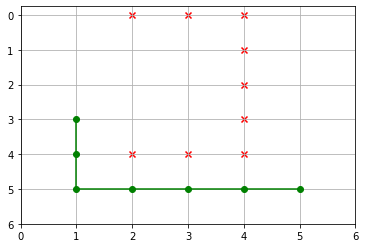

In [9]:
# Visualization  - for your understanding
# not required for exam.
#Obstacles
invalid_links=[link.coord[::-1] for row in grid for link in row if link.value==0]
import matplotlib.markers as mp
import matplotlib.pyplot as plt
import numpy as np

a=[]
plt.gca().invert_yaxis()

yint = range(0,len(grid))
xint = range(0, len(grid[0]))

if path:
    print("** Path ** ")
    for p in path:
        a.append(p.coord[::-1])
    plt.plot(*zip(*a), marker='o', color='green')
    #obstacles
    if invalid_links:
        plt.scatter(*zip(*invalid_links), marker='x', color='red')
    plt.yticks(yint);plt.xticks(xint)
    plt.grid(True)
    plt.show()  


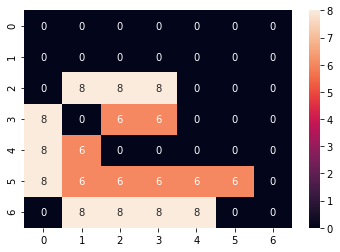

In [10]:
import seaborn as sns

f_vals = []
for row in grid:
    vals=[]
    for col in row:
        vals.append(col.g+col.h)
    f_vals.append(vals)


ax = sns.heatmap(f_vals, annot=True, fmt="d")